# Healthy Control

In [1]:
def flatten_HC(subject_list):
    from nilearn.masking import apply_mask
    import numpy as np
    import pandas as pd
    from nilearn.image import load_img
    from nilearn.image import new_img_like

    fmri_img = '/data/EFAT/EFAT_output/HC/datasink/1stLevel/sub-005/fwhm-8/con_0007.nii'
    ROI = load_img('/data/EFAT/anxiety_association-test_z_FDR_0.01-interp.nii').get_data().astype(bool)
    ROI = new_img_like(fmri_img, ROI.astype(np.int))
    
    mask_img = ROI
    
    flattened = []
    for i in subject_list:
        func_filename = ('/data/EFAT/EFAT_output/HC/datasink/1stLevel/sub-%s/fwhm-8/con_0007.nii' % i)
        
        masked_data = apply_mask(func_filename, mask_img)
        flattened.append(masked_data)
        
    return flattened

In [2]:
subject_HC = ['005', '006', '007', 
                   '010', '013', '014', '015', 
                   '019', '021', '022', '025', 
                   '026', '029', '032', '034', 
                   '036', '039', '041', 
                   '045', '050', 
                   '055', '056', '058', '059']

In [3]:
import numpy as np
A = np.asmatrix(flatten_HC(subject_HC))
A

/home/soyeon/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


matrix([[ 0.06765573,  0.04926062,  0.03387223, ...,  0.23089176,
          0.22814202,  0.21659723],
        [ 0.31400055,  0.29057258,  0.2498604 , ...,  1.1762837 ,
          1.1000488 ,  1.025689  ],
        [-0.05964667, -0.10469085, -0.1519965 , ..., -0.20918335,
         -0.23407573, -0.2606703 ],
        ...,
        [-0.3475198 , -0.3026061 , -0.2471168 , ...,  0.07291843,
          0.084618  ,  0.10183343],
        [ 0.06647748,  0.05595124,  0.04931122, ...,  0.210969  ,
          0.25720558,  0.31282547],
        [ 0.18350232,  0.18928492,  0.19415802, ...,  0.11630442,
          0.11147629,  0.10867966]], dtype=float32)

In [4]:
A.shape

(24, 20960)

In [5]:
%matplotlib inline

<function matplotlib.pyplot.show(*args, **kw)>

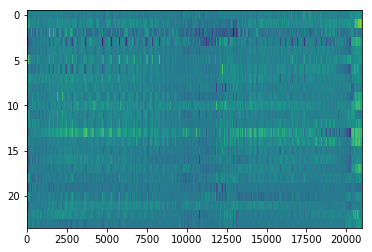

In [6]:
import matplotlib.pyplot as plt

plt.imshow(A, aspect='auto')
plt.show

# Patient Group

In [7]:
def flatten_PT(subject_list):
    from nilearn.masking import apply_mask
    import numpy as np
    import pandas as pd
    from nilearn.image import load_img
    from nilearn.image import new_img_like

    fmri_img = '/data/EFAT/EFAT_output/HC/datasink/1stLevel/sub-005/fwhm-8/con_0007.nii'
    ROI = load_img('/data/EFAT/anxiety_association-test_z_FDR_0.01-interp.nii').get_data().astype(bool)
    ROI = new_img_like(fmri_img, ROI.astype(np.int))
    
    mask_img = ROI
    
    flattened = []
    for i in subject_list:
        func_filename = ('/data/EFAT/EFAT_output/PT/datasink/1stLevel/sub-%s/fwhm-8/con_0007.nii' % i)
        
        masked_data = apply_mask(func_filename, mask_img)
        flattened.append(masked_data)
        
    return flattened

In [8]:
subject_PT = ['058', '060', '066',  
            '074', '075', '080', 
            '082', '083', '084', '086', '087', '089', 
            '095', '096', '101', '103', 
            '104', '105', '106', '108', 
            '113', '114', '117', '118', '120', '121', 
            '124', '125', '128', '131', 
            '134', '136', '138', '140', '141', 
            '142', '143', '146', '150', 
            '153', '156', '159', '160', '162', '165', 
            '168', '169', '171', '181', '182', 
            '183', '190', '193', '199', 
            '201', '205', '206', '209', '212']

In [9]:
import numpy as np
B = np.asmatrix(flatten_PT(subject_PT))
B

matrix([[ 0.13468039,  0.17280138,  0.20301867, ...,  0.84515846,
          0.87736046,  0.91394323],
        [ 0.3100138 ,  0.32164598,  0.3228347 , ...,  0.2973867 ,
          0.27433205,  0.25053686],
        [-0.12425005, -0.13571256, -0.15185815, ...,  0.1142416 ,
          0.10745546,  0.09673867],
        ...,
        [-1.0651155 , -1.0978962 , -1.0997355 , ...,  0.03511468,
          0.00880063, -0.01416506],
        [ 0.01254898, -0.04455832, -0.11565241, ...,  0.10462412,
          0.10482979,  0.10883082],
        [ 0.15289605,  0.18695319,  0.2186197 , ...,  0.24307331,
          0.23280135,  0.21853817]], dtype=float32)

In [10]:
B.shape

(59, 20960)

<function matplotlib.pyplot.show(*args, **kw)>

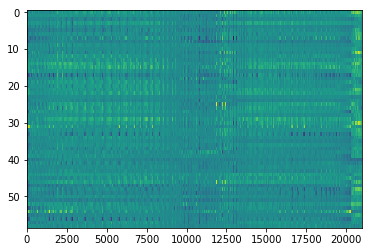

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(B, aspect='auto')
plt.show

# Concatenate two groups (HC, PT)

In [12]:
import numpy as np

In [14]:
Matrix = np.concatenate((A, B), axis=0)

In [15]:
Matrix.shape

(83, 20960)

<function matplotlib.pyplot.show(*args, **kw)>

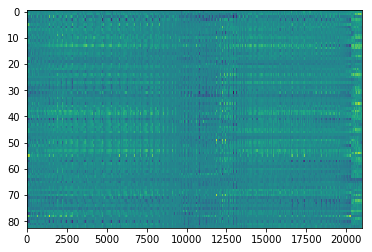

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(Matrix, aspect='auto')
plt.show

## Check whether two ROI files (one with nilearn and the other with xjView) are same

In [18]:
from nilearn.image import load_img
from nilearn.image import new_img_like

fmri_img = '/data/EFAT/EFAT_output/HC/datasink/1stLevel/sub-010/fwhm-8/con_0007.nii'
ROI = load_img('/data/EFAT/anxiety_association-test_z_FDR_0.01-interp.nii').get_data().astype(bool)
ROI = new_img_like(fmri_img, ROI.astype(np.int))

In [19]:
ROI.shape

(157, 189, 156)

In [20]:
# cut in x-direction
sagittal = -26
# cut in y-direction
coronal = 0
# cut in z-direction
axial = -24

# coordinates displaying should be prepared as a list
cut_coords = [sagittal, coronal, axial]

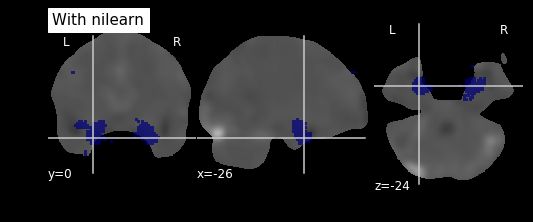

In [23]:
from nilearn.plotting import plot_roi, show
from nilearn import image

mean_img = image.mean_img(fmri_img)
plot_roi(ROI, mean_img, cut_coords=cut_coords,
         title='With nilearn')

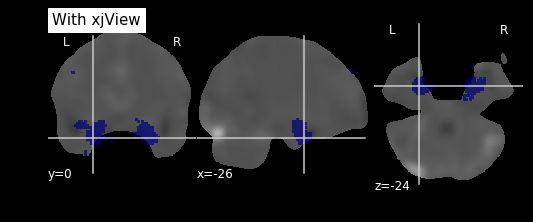

In [24]:
from nilearn.plotting import plot_roi, show
from nilearn import image

ROI2 = '/data/EFAT/Mask.img'
mean_img = image.mean_img(fmri_img)
plot_roi(ROI2, mean_img, cut_coords=cut_coords,
         title='With xjView')

# Add Diagnoses feature

In [46]:
import pandas as pd
import numpy as np

D = pd.read_excel('/data/EFAT/info/Diagnoses_2.xlsx')
D

,Subject ID,PrimaryDx,Co-Morbidity,Past Diagnoses
0,RDPT058,GAD,SAD,Past MDD
1,RDPT060,MDD,"PTSD, GAD",none
2,RDPT066,GAD,"SAD, Specific phobia (animal type - spiders,na...",Past PTSD
3,RDPT074,SAD,MDD,none
4,RDPT075,MDD,none,none
5,RDPT080,MDD,"PTSD, SAD",none
6,RDPT082,GAD,"SAD, MDD",none
7,RDPT083,GAD,NaN,Past MDD
8,RDPT084,MDD,"GAD, OCD, Specific phobia",none
9,RDPT086,GAD,"OCD, SAD",Past PTSD


In [55]:
Dia = D['PrimaryDx']
Dia = np.asmatrix(Dia)
Dia.shape = (59, 1)
Dia

matrix([['GAD'],
        ['MDD'],
        ['GAD'],
        ['SAD'],
        ['MDD'],
        ['MDD'],
        ['GAD'],
        ['GAD'],
        ['MDD'],
        ['GAD'],
        ['SAD'],
        ['GAD'],
        ['SAD'],
        ['GAD'],
        ['GAD sxs'],
        ['SAD'],
        ['MDD'],
        ['Dysthymia '],
        ['GAD'],
        ['GAD'],
        ['GAD sxs'],
        ['PD sxs'],
        ['GAD'],
        ['MDD'],
        ['MDD'],
        ['GAD'],
        ['GAD'],
        ['MDD'],
        ['MDD'],
        ['GAD'],
        ['GAD'],
        ['GAD'],
        ['GAD'],
        ['MDD'],
        ['SAD'],
        ['GAD'],
        ['GAD'],
        ['SAD'],
        ['GAD'],
        ['GAD'],
        ['SAD'],
        ['SAD'],
        ['GAD'],
        ['SAD'],
        ['SAD'],
        ['SAD'],
        ['SAD'],
        ['Panic'],
        ['GAD'],
        ['MDD'],
        ['MDD'],
        ['SAD'],
        ['GAD'],
        ['MDD'],
        ['GAD'],
        ['GAD'],
        ['MDD'],
        ['M

In [56]:
a = np.empty((24,1))
a[:] = np.nan
a = np.asmatrix(a)
a

matrix([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan]])

In [59]:
DX_primary = np.concatenate((a, Dia), axis=0)
DX_primary

matrix([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        ['GAD'],
        ['MDD'],
        ['GAD'],
        ['SAD'],
        ['MDD'],
        ['MDD'],
        ['GAD'],
        ['GAD'],
        ['MDD'],
        ['GAD'],
        ['SAD'],
        ['GAD'],
        ['SAD'],
        ['GAD'],
        ['GAD sxs'],
        ['SAD'],
        ['MDD'],
        ['Dysthymia '],
        ['GAD'],
        ['GAD'],
        ['GAD sxs'],
        ['PD sxs'],
        ['GAD'],
        ['MDD'],
        ['MDD'],
        ['GAD'],
        ['GAD'],
        ['MDD'],
        ['MDD'],
        ['GAD'],
        ['GAD'],
        ['GAD'],
        ['GAD'],
        ['MDD'],
        ['SAD'],
        ['GAD'],
        ['

In [60]:
# add diagnoses feature

Matrix_Primary = np.concatenate((Matrix, DX_primary), axis=1)
Matrix_Primary.shape

(83, 20961)